# FARGOpy
## Wrapping FRAGO3D

## Tutorial: animating `FARGO3D` simulation results

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/fargopy/blob/main/examples/fargopy-tutorial-animations.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### What's in this notebook

In this notebook we illustrate **how to generate animations** using `FARGOpy`.  Our goal is to create an animation like this:

<p align="center"><img src="https://github.com/seap-udea/fargopy/blob/main/examples/figures/fargo.gif?raw=true" alt="Animation""/></p>

### Before starting

If you are in `Google Colab`, install the latest version of the package:

In [21]:
# @title Install fargopy
import sys
if 'google.colab' in sys.modules:
    !sudo pip install -Uq fargopy celluloid
    !mkdir -p figures

For this tutorial you will need the following external modules and tools:

In [12]:
import fargopy as fp
import numpy as np 
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Let's `FARGOpy`

First we need the data. Let's download a precomputed simulation. Check the list:

In [3]:
fp.Simulation.list_precomputed()

fargo:
	Description: Protoplanetary disk with a Jovian planet in 2D
	Size: 55 MB
p3diso:
	Description: Protoplanetary disk with a Super earth planet in 3D
	Size: 220 MB
p3disof:
	Description: Protoplanetary disk with a a Super earth planet in 3D (increased resolution)
	Size: 440 MB
fargo_multifluid:
	Description: Protoplanetary disk with several fluids (dust) and a Jovian planet in 2D
	Size: 100 MB
binary:
	Description: Disk around a binary with the properties of Kepler-38 in 2D
	Size: 140 MB


Download, for instance, the 2D simulation of a disk with a Jovian planet:

In [5]:
fp.Simulation.download_precomputed('fargo')

Downloading...
From: https://docs.google.com/uc?export=download&id=1YXLKlf9fCGHgLej2fSOHgStD05uFB2C3
To: /tmp/fargo.tgz
100%|██████████| 54.7M/54.7M [00:02<00:00, 19.9MB/s]


Uncompressing fargo.tgz into /tmp/fargo
Done.


Once download it, we need to connect a `Simulation` with the directory with the simulation results:

In [25]:
sim = fp.Simulation(output_dir='/tmp/fargo')

Your simulation is now connected with '/home/jzuluaga/fargo3d/'
Now you are connected with output directory '/tmp/fargo'


Before any postprocessing we need to load simulation parameters:

In [26]:
sim.load_properties()

Loading variables
84 variables loaded
Simulation in 2 dimensions
Loading domain in cylindrical coordinates:
	Variable phi: 384 [[0, -3.1334114227210694], [-1, 3.1334114227210694]]
	Variable r: 128 [[0, 0.408203125], [-1, 2.491796875]]
	Variable z: 1 [[0, 0.0], [-1, 0.0]]
Number of snapshots in output directory: 51
Configuration variables and domains load into the object. See e.g. <sim>.vars


: 

Let's read the field we want to animate, eg. the gas density:

In [8]:
gasdens_all = sim.load_allfields('gasdens')

Before making any animation it is a good practice to design the plot we want to animate. 


Let's make for instance a `meshslice` of the gas density at a given snapshot and plot a `pcolormesh` of density in a cartesian grid.

The slice is done using:

In [9]:
gasdens_snap = gasdens_all.item('20').gasdens
gasdens_plane,mesh = gasdens_snap.meshslice(slice='z=0')

And the plot can be done using:

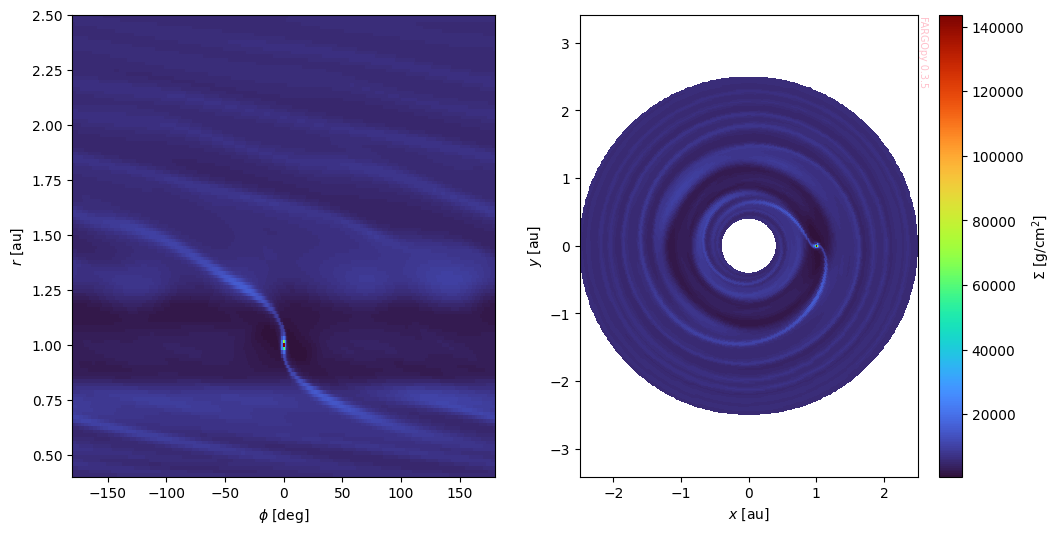

In [10]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
cmap = 'turbo'

ax = axs[0]
ax.pcolormesh(mesh.phi*fp.RAD,mesh.r*sim.UL/fp.AU,gasdens_plane*sim.USIGMA,cmap=cmap)
ax.set_xlabel('$\phi$ [deg]')
ax.set_ylabel('$r$ [au]')

ax = axs[1]
c = ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,gasdens_plane*sim.USIGMA,cmap=cmap)
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$y$ [au]')
ax.axis('equal')
fp.Util.fargopy_mark(ax)

axc = fig.colorbar(c)
axc.set_label("$\Sigma$ [g/cm$^2$]")

Notice that we have used the units of the simulation to convert all quantities from simulation units to physical units.

Now, to create the animation we repeat the previous procedure at each snapshot:

In [19]:
plt.ioff()
fig,axs = plt.subplots(1,2,figsize=(12,6))
cmap = 'turbo'

# Create a Celluloid camera
camera = Camera(fig)

for snapshot in tqdm(gasdens_all.snapshots):
    # For each snapshot get the desnity and meshslice it
    gasdens_snap = gasdens_all.item(str(snapshot)).gasdens
    gasdens_plane,mesh = gasdens_snap.meshslice(slice='z=0')

    ax = axs[0]
    ax.pcolormesh(mesh.phi*fp.RAD,mesh.r*sim.UL/fp.AU,gasdens_plane*sim.USIGMA,cmap=cmap)
    ax.set_xlabel('$\phi$ [deg]')
    ax.set_ylabel('$r$ [au]')

    ax = axs[1]
    c = ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,gasdens_plane*sim.USIGMA,cmap=cmap)
    ax.set_xlabel('$x$ [au]')
    ax.set_ylabel('$y$ [au]')
    ax.axis('equal')
    fp.Util.fargopy_mark(ax)

    # Take a snapshot of the figure
    camera.snap()

# Create the animation object
animation = camera.animate()
plt.ion()

100%|██████████| 51/51 [00:00<00:00, 60.19it/s]


Once you have snapped all the frames we can create the animation, save it and/or visualize it:

In [20]:
HTML(animation.to_html5_video())

Save it into a gif:

In [24]:
animation.save('figures/fargo.gif', fps=5)

And that's it!

### Animations preview

Since the animations in this notebook will not be displayed on the web we include here the animation figures which are available in the `GitHub` repository:

<p align="center"><img src="https://github.com/seap-udea/fargopy/blob/main/examples/figures/fargo.gif?raw=true" alt="Animation""/></p>